In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
torch.manual_seed(1)

In [4]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=False)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

print("train_dataset size:", len(train_dataset),"\ntest_dataset size:", len(test_dataset))

train_dataset size: 60000 
test_dataset size: 10000


In [5]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=600, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=100, 
                                          shuffle=False)

In [6]:
class M1(nn.Module):
    def __init__(self):
        super(M1, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size) #1st Convolution
        self.pool = nn.MaxPool2d(2, 2)   #pool_size=2, strides=2 
        self.conv2 = nn.Conv2d(10, 20, kernel_size) #2nd Convolution
        self.fc1 = nn.Linear(320, 10) #((I/P - Filter + 2*Pad)/Stride)+1 
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(10, 5)
        self.fc3 = nn.Linear(5, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 320)            #Flattening 
        x = F.relu(self.fc1(x))        #Fully Connected NN   
        x = self.dropout(x)   
        x = F.relu(self.fc2(x))        #Fully Connected NN           
        x = self.fc3(x)                #O/P Layer       
        return x
        

In [7]:
class M2(nn.Module):
    def __init__(self,):
        super(M2, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 10, kernel_size) #1st Convolution
        self.pool = nn.MaxPool2d(2, 2)   #pool_size=2, strides=2 
        self.conv2 = nn.Conv2d(10, 20, kernel_size) #2nd Convolution
        self.fc1 = nn.Linear(320, 15) #((I/P - Filter + 2*Pad)/Stride)+1 
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(15, 20)
        self.fc3 = nn.Linear(20, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 320)            #Flattening 
        x = F.relu(self.fc1(x))        #Fully Connected NN   
        x = self.dropout(x)   
        x = F.relu(self.fc2(x))        #Fully Connected NN           
        x = self.fc3(x)                #O/P Layer       
        return x


In [8]:
class M3(nn.Module):
    def __init__(self,):
        super(M3, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size) #1st Convolution
        self.pool = nn.MaxPool2d(2, 2)   #pool_size=2, strides=2 
        self.conv2 = nn.Conv2d(10, 20, kernel_size) #2nd Convolution
        self.fc1 = nn.Linear(320, 30) #((I/P - Filter + 2*Pad)/Stride)+1 
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(30, 15)
        self.fc3 = nn.Linear(15, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 320)            #Flattening 
        x = F.relu(self.fc1(x))        #Fully Connected NN   
        x = self.dropout(x)   
        x = F.relu(self.fc2(x))        #Fully Connected NN           
        x = self.fc3(x)                #O/P Layer       
        return x

In [9]:
class M4(nn.Module):
    def __init__(self,):
        super(M4, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size) #1st Convolution
        self.pool = nn.MaxPool2d(2, 2)   #pool_size=2, strides=2 
        self.conv2 = nn.Conv2d(10, 20, kernel_size) #2nd Convolution
        self.fc1 = nn.Linear(320, 50) #((I/P - Filter + 2*Pad)/Stride)+1 
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 320)            #Flattening 
        x = F.relu(self.fc1(x))        #Fully Connected NN   
        x = self.dropout(x)   
        x = F.relu(self.fc2(x))        #Fully Connected NN           
        x = self.fc3(x)                #O/P Layer       
        return x

In [10]:
class M5(nn.Module):
    def __init__(self,):
        super(M5, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 10, kernel_size) #1st Convolution
        self.pool = nn.MaxPool2d(2, 2)   #pool_size=2, strides=2 
        self.conv2 = nn.Conv2d(10, 20, kernel_size) #2nd Convolution
        self.fc1 = nn.Linear(320, 50) #((I/P - Filter + 2*Pad)/Stride)+1 
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(50, 90)
        self.fc3 = nn.Linear(90, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 320)            #Flattening 
        x = F.relu(self.fc1(x))        #Fully Connected NN   
        x = self.dropout(x)   
        x = F.relu(self.fc2(x))        #Fully Connected NN           
        x = self.fc3(x)                #O/P Layer       
        return x

In [11]:
class M6(nn.Module):
    def __init__(self,):
        super(M6, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size) #1st Convolution
        self.pool = nn.MaxPool2d(2, 2)   #pool_size=2, strides=2 
        self.conv2 = nn.Conv2d(10, 20, kernel_size) #2nd Convolution
        self.fc1 = nn.Linear(320, 50) #((I/P - Filter + 2*Pad)/Stride)+1 
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(50, 200)
        self.fc3 = nn.Linear(200, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 320)            #Flattening 
        x = F.relu(self.fc1(x))        #Fully Connected NN   
        x = self.dropout(x)   
        x = F.relu(self.fc2(x))        #Fully Connected NN           
        x = self.fc3(x)                #O/P Layer       
        return x

In [12]:
class M7(nn.Module):
    def __init__(self,):
        super(M7, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size) #1st Convolution
        self.pool = nn.MaxPool2d(2, 2)   #pool_size=2, strides=2 
        self.conv2 = nn.Conv2d(10, 20, kernel_size) #2nd Convolution
        self.fc1 = nn.Linear(320, 50) #((I/P - Filter + 2*Pad)/Stride)+1 
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(50, 210)
        self.fc3 = nn.Linear(210, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 320)            #Flattening 
        x = F.relu(self.fc1(x))        #Fully Connected NN   
        x = self.dropout(x)   
        x = F.relu(self.fc2(x))        #Fully Connected NN           
        x = self.fc3(x)                #O/P Layer       
        return x

        

In [13]:
class M8(nn.Module):
    def __init__(self,):
        super(M8, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 10, kernel_size) #1st Convolution
        self.pool = nn.MaxPool2d(2, 2)   #pool_size=2, strides=2 
        self.conv2 = nn.Conv2d(10, 20, kernel_size) #2nd Convolution
        self.fc1 = nn.Linear(320, 80) #((I/P - Filter + 2*Pad)/Stride)+1 
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(80, 50)
        self.fc3 = nn.Linear(50, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 320)            #Flattening 
        x = F.relu(self.fc1(x))        #Fully Connected NN   
        x = self.dropout(x)   
        x = F.relu(self.fc2(x))        #Fully Connected NN           
        x = self.fc3(x)                #O/P Layer       
        return x

In [14]:
class M9(nn.Module):
    def __init__(self,):
        super(M9, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size) #1st Convolution
        self.pool = nn.MaxPool2d(2, 2)   #pool_size=2, strides=2 
        self.conv2 = nn.Conv2d(10, 20, kernel_size) #2nd Convolution
        self.fc1 = nn.Linear(320, 50) #((I/P - Filter + 2*Pad)/Stride)+1 
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(50, 250)
        self.fc3 = nn.Linear(250, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 320)            #Flattening 
        x = F.relu(self.fc1(x))        #Fully Connected NN   
        x = self.dropout(x)   
        x = F.relu(self.fc2(x))        #Fully Connected NN           
        x = self.fc3(x)                #O/P Layer       
        return x

In [15]:
class M10(nn.Module):
    def __init__(self,):
        super(M10, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size) #1st Convolution
        self.pool = nn.MaxPool2d(2, 2)   #pool_size=2, strides=2 
        self.conv2 = nn.Conv2d(10, 20, kernel_size) #2nd Convolution
        self.fc1 = nn.Linear(320, 50) #((I/P - Filter + 2*Pad)/Stride)+1 
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(50, 300)
        self.fc3 = nn.Linear(300, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 320)            #Flattening 
        x = F.relu(self.fc1(x))        #Fully Connected NN   
        x = self.dropout(x)   
        x = F.relu(self.fc2(x))        #Fully Connected NN           
        x = self.fc3(x)                #O/P Layer       
        return x

In [16]:
# Hyper-parameters 
input_size = 784 # 28x28
max_epochs = 15
learning_rate = 0.001
kernel_size = 4
num_epochs = 10
dropout = 0.25
#weight_decay_val = 1e-4

In [17]:
#train function
def trainFunc(model,num_epochs):
    model.train()
    n_total_steps = len(train_loader)
    train_losses = []
    train_epoch = []
    train_acc = []
    not_converged =True
    epoch = 0
    while not_converged:
        epoch += 1
        n_correct = 0
        n_samples = 0
        for i, (images, labels) in enumerate(train_loader):  
            # Forward pass
            prediction = model(images)
            loss = loss_func(prediction, labels)
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(prediction.data, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()
            acc = 100.0 * n_correct / n_samples

            if (i+1) % 100 == 0:
                print (f'Epoch [{epoch}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
                train_epoch.append(epoch)
                train_losses.append(loss.item())
                print(f'Epoch [{epoch}/{num_epochs}], Accuracy : {acc} %')
                train_acc.append(acc)

                if epoch == num_epochs:
                        print("Max Epoch Reached")
                        not_converged = False
                elif (epoch > 5) and  (train_losses[-1] < 0.001):
                    if abs(train_losses[-3] - train_losses[-2]) < 1.0e-05 and abs(train_losses[-2] - train_losses[-1]) < 1.0e-05:
                        print("Convergeance reached for loss:",train_losses[-1])
                        not_converged = False
                        
    return train_epoch,train_losses,train_acc

In [18]:
len(test_loader.dataset)

10000

In [22]:
# Test function
# In test phase, we don't need to compute gradients (for memory efficiency)
def testFunc(model): 
    model.eval()
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        testLoss = 0
        count = 0
        for images, labels in test_loader:
            prediction = model(images)
            tLoss = loss_func(prediction, labels)
            testLoss += tLoss
            # max returns (value ,index)
            _, predicted = torch.max(prediction.data, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()
            count += 1

        testLoss /= count
        netTest_acc1 = 100.0 * n_correct / n_samples
        print(f'Accuracy of the network:{model} on the test images: {netTest_acc1} % & loss of the network:{testLoss:.4f}')
        return netTest_acc1,testLoss

In [23]:
print("\nModel1 Test")
torch.manual_seed(1)

m1 = M1()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(m1.parameters(), lr=learning_rate) #, weight_decay = weight_decay_val)

a=[]
for i in m1.parameters():
    a.append(torch.numel(i))
m1_TotalPrams = np.sum(a)
print('Total no of parameters in Model 1:', m1_TotalPrams)

M1train_epoch,M1train_losses,M1train_acc = trainFunc(m1,num_epochs)

print("\nModel2 Test")
torch.manual_seed(1)
m2 = M2()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(m2.parameters(), lr=learning_rate) #, weight_decay = weight_decay_val)

a=[]
for i in m2.parameters():
    a.append(torch.numel(i))
m2_TotalPrams = np.sum(a)
print('Total no of parameters in Model 2:', m2_TotalPrams)

M2train_epoch,M2train_losses,M2train_acc = trainFunc(m2,num_epochs)

print("\nModel3 Test")
torch.manual_seed(1)
m3 = M3()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(m3.parameters(), lr=learning_rate) #, weight_decay = weight_decay_val)

a=[]
for i in m3.parameters():
    a.append(torch.numel(i))
m3_TotalPrams = np.sum(a)
print('Total no of parameters in Model 3:', m3_TotalPrams)
M3train_epoch,M3train_losses,M3train_acc = trainFunc(m3,num_epochs)

print("\nModel4 Test")
torch.manual_seed(1)
m4 = M4()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(m4.parameters(), lr=learning_rate) #, weight_decay = weight_decay_val)

a=[]
for i in m4.parameters():
    a.append(torch.numel(i))
m4_TotalPrams = np.sum(a)
print('Total no of parameters in Model 4:', m4_TotalPrams)
M4train_epoch,M4train_losses,M4train_acc = trainFunc(m4,num_epochs)

print("\nModel5 Test")
torch.manual_seed(1)
m5 = M5()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(m5.parameters(), lr=learning_rate) #, weight_decay = weight_decay_val)

a=[]
for i in m5.parameters():
    a.append(torch.numel(i))
m5_TotalPrams = np.sum(a)
print('Total no of parameters in Model 5:', m5_TotalPrams)
M5train_epoch,M5train_losses,M5train_acc = trainFunc(m5,num_epochs)

print("\nModel6 Test")
torch.manual_seed(1)
m6 = M6()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(m6.parameters(), lr=learning_rate) #, weight_decay = weight_decay_val)

a=[]
for i in m6.parameters():
    a.append(torch.numel(i))
m6_TotalPrams = np.sum(a)
print('Total no of parameters in Model 6:', m6_TotalPrams)
M6train_epoch,M6train_losses,M6train_acc = trainFunc(m6,num_epochs)

print("\nModel7 Test")
torch.manual_seed(1)
m7 = M7()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(m7.parameters(), lr=learning_rate) #, weight_decay = weight_decay_val)

a=[]
for i in m7.parameters():
    a.append(torch.numel(i))
m7_TotalPrams = np.sum(a)
print('Total no of parameters in Model 7:', m7_TotalPrams)
M7train_epoch,M7train_losses,M7train_acc = trainFunc(m7,num_epochs)

print("\nModel8 Test")
torch.manual_seed(1)
m8 = M8()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(m8.parameters(), lr=learning_rate) #, weight_decay = weight_decay_val)

a=[]
for i in m8.parameters():
    a.append(torch.numel(i))
m8_TotalPrams = np.sum(a)
print('Total no of parameters in Model 8:', m8_TotalPrams)
M8train_epoch,M8train_losses,M8train_acc = trainFunc(m8,num_epochs)

print("\nModel9 Test")
torch.manual_seed(1)
m9 = M9()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(m9.parameters(), lr=learning_rate) #, weight_decay = weight_decay_val)

a=[]
for i in m9.parameters():
    a.append(torch.numel(i))
m9_TotalPrams = np.sum(a)
print('Total no of parameters in Model 9:', m9_TotalPrams)
M9train_epoch,M9train_losses,M9train_acc = trainFunc(m9,num_epochs)

print("\nModel10 Test")
torch.manual_seed(1)
m10 = M10()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(m10.parameters(), lr=learning_rate) #, weight_decay = weight_decay_val)

a=[]
for i in m10.parameters():
    a.append(torch.numel(i))
m10_TotalPrams = np.sum(a)
print('Total no of parameters in Model 10:', m10_TotalPrams)
M10train_epoch,M10train_losses,M10train_acc = trainFunc(m10,num_epochs)





Model1 Test
Total no of parameters in Model 1: 6715
Epoch [1/10], Step [100/100], Loss: 1.5043
Epoch [1/10], Accuracy : 28.218333333333334 %
Epoch [2/10], Step [100/100], Loss: 1.1512
Epoch [2/10], Accuracy : 53.763333333333335 %
Epoch [3/10], Step [100/100], Loss: 0.9208
Epoch [3/10], Accuracy : 63.00666666666667 %
Epoch [4/10], Step [100/100], Loss: 0.9110
Epoch [4/10], Accuracy : 67.67166666666667 %
Epoch [5/10], Step [100/100], Loss: 0.7832
Epoch [5/10], Accuracy : 71.81333333333333 %
Epoch [6/10], Step [100/100], Loss: 0.7320
Epoch [6/10], Accuracy : 74.85833333333333 %
Epoch [7/10], Step [100/100], Loss: 0.6674
Epoch [7/10], Accuracy : 76.39666666666666 %
Epoch [8/10], Step [100/100], Loss: 0.6463
Epoch [8/10], Accuracy : 77.36166666666666 %
Epoch [9/10], Step [100/100], Loss: 0.6278
Epoch [9/10], Accuracy : 77.69333333333333 %
Epoch [10/10], Step [100/100], Loss: 0.6525
Epoch [10/10], Accuracy : 78.17666666666666 %
Max Epoch Reached

Model2 Test
Total no of parameters in Model 

In [24]:
M1netTest_acc1,M1testLoss = testFunc(m1)
M2netTest_acc1,M2testLoss = testFunc(m2)
M3netTest_acc1,M3testLoss = testFunc(m3)
M4netTest_acc1,M4testLoss = testFunc(m4)
M5netTest_acc1,M5testLoss = testFunc(m5)
M6netTest_acc1,M6testLoss = testFunc(m6)
M7netTest_acc1,M7testLoss = testFunc(m7)
M8netTest_acc1,M8testLoss = testFunc(m8)
M9netTest_acc1,M9testLoss = testFunc(m9)
M10netTest_acc1,M10testLoss = testFunc(m10)

Accuracy of the network:M1(
  (conv1): Conv2d(1, 10, kernel_size=(4, 4), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(4, 4), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=10, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=10, bias=True)
) on the test images: 94.91 % & loss of the network:0.2342
Accuracy of the network:M2(
  (conv1): Conv2d(1, 10, kernel_size=(4, 4), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(4, 4), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=15, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=15, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=10, bias=True)
) on the test images: 96.

In [25]:
#plot loss vs param
model_TrainLoss = [np.min(M1train_losses),np.min(M2train_losses),
              np.min(M3train_losses),np.min(M4train_losses),
              np.min(M5train_losses),np.min(M6train_losses),
              np.min(M7train_losses),np.min(M8train_losses),
              np.min(M9train_losses),np.min(M10train_losses)      
            ]
model_Tparams = [m1_TotalPrams,m2_TotalPrams,m3_TotalPrams,
                m4_TotalPrams,m5_TotalPrams,m6_TotalPrams,
                m7_TotalPrams,m8_TotalPrams,m9_TotalPrams,
                m10_TotalPrams
                ]
model_Testloss = [M1testLoss,M2testLoss,M3testLoss,M4testLoss,M5testLoss,
                  M6testLoss,M7testLoss,M8testLoss,M9testLoss,M10testLoss     
                ]



In [26]:
np.linspace(0.0,0.6,31)

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 ])

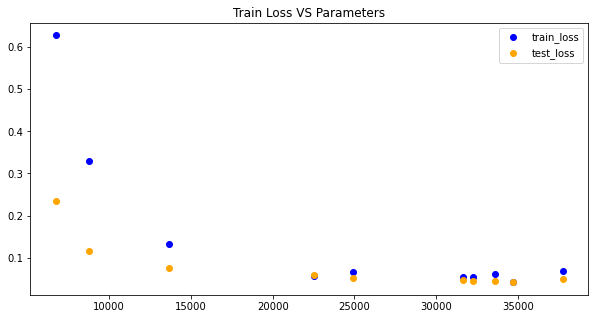

In [27]:
#TrainLoss Vs Param plot
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.scatter(model_Tparams,model_TrainLoss,color="blue")
plt.scatter(model_Tparams,model_Testloss,color="orange")
#plt.yticks(np.array(np.linspace(0.0,0.6,10)),model_Tparams)
plt.legend(['train_loss','test_loss'])
plt.title('Train Loss VS Parameters')
plt.show()

In [28]:
# #TestLoss Vs Param plot
# f = plt.figure()
# f.set_figwidth(10)
# f.set_figheight(5)
# #plt.scatter(model_Tparams,model_TrainLoss,color="blue")
# plt.scatter(model_Tparams,model_Testloss,color="orange")
# #plt.yticks(np.array(np.linspace(0.0,0.6,10)),model_Tparams)
# plt.legend(['test_loss'])
# plt.title('Test Loss VS Parameters')
# plt.show()

In [29]:
model_Testloss

[tensor(0.2342),
 tensor(0.1157),
 tensor(0.0744),
 tensor(0.0596),
 tensor(0.0510),
 tensor(0.0462),
 tensor(0.0444),
 tensor(0.0445),
 tensor(0.0414),
 tensor(0.0483)]

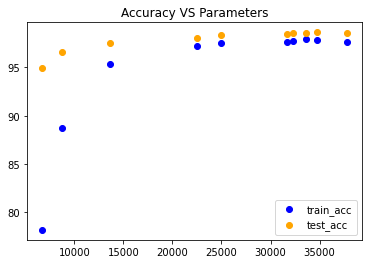

In [32]:
#plot Acc vs param
model_TrainAcc = [np.max(M1train_acc),np.max(M2train_acc),
              np.max(M3train_acc),np.max(M4train_acc),
              np.max(M5train_acc),np.max(M6train_acc),
              np.max(M7train_acc),np.max(M8train_acc),
              np.max(M9train_acc),np.max(M10train_acc)      
            ]
model_Tparams = [m1_TotalPrams,m2_TotalPrams,m3_TotalPrams,
                m4_TotalPrams,m5_TotalPrams,m6_TotalPrams,
                m7_TotalPrams,m8_TotalPrams,m9_TotalPrams,
                m10_TotalPrams
                ]
model_TestAcc = [M1netTest_acc1,M2netTest_acc1,M3netTest_acc1,M4netTest_acc1,M5netTest_acc1,
                  M6netTest_acc1,M7netTest_acc1,M8netTest_acc1,M9netTest_acc1,M10netTest_acc1     
                ]
plt.scatter(model_Tparams,model_TrainAcc,color="blue")
plt.scatter(model_Tparams,model_TestAcc,color="orange")
plt.legend(['train_acc','test_acc'])
plt.title('Accuracy VS Parameters')
plt.show()


In [31]:
model_TestAcc

[94.91, 96.62, 97.53, 98.03, 98.4, 98.44, 98.54, 98.57, 98.64, 98.52]